In [1]:
%matplotlib inline
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import mne

# --- make sure we can import from src/ ---
repo_root = Path.cwd().parents[0]   # notebooks/ -> repo root
sys.path.append(str(repo_root / "src"))

from preprocess_core import preprocess_single

mne.set_log_level("ERROR")

edf = Path("data_raw/DATA/01_no_epilepsy/aaaaafiy/s002_2010/01_tcp_ar/aaaaafiy_s002_t001.edf")


In [2]:
# after you appended ../src to sys.path
repo_root = Path.cwd().parents[0]  # notebooks/ -> repo root

edf = repo_root / "data_raw/DATA/01_no_epilepsy/aaaaafiy/s002_2010/01_tcp_ar/aaaaafiy_s002_t001.edf"
print(edf)           # sanity-check the resolved path
print(edf.exists())  # should be True

res = preprocess_single(
    edf, band=(0.5, 100.0), resample_hz=250.0,
    epoch_len=2.0, reject_percentile=95.0,
    ica_components=None, return_psd=True
)
res.keys(), len(res["epochs"]), res["threshold_uv"]


c:\Users\georg\Documents\GitHub\thesis-epilepsy-gnn\data_raw\DATA\01_no_epilepsy\aaaaafiy\s002_2010\01_tcp_ar\aaaaafiy_s002_t001.edf
True


(dict_keys(['raw_after', 'epochs', 'labels', 'threshold_uv', 'present_channels', 'psd_before', 'psd_after']),
 559,
 98.95166389843224)

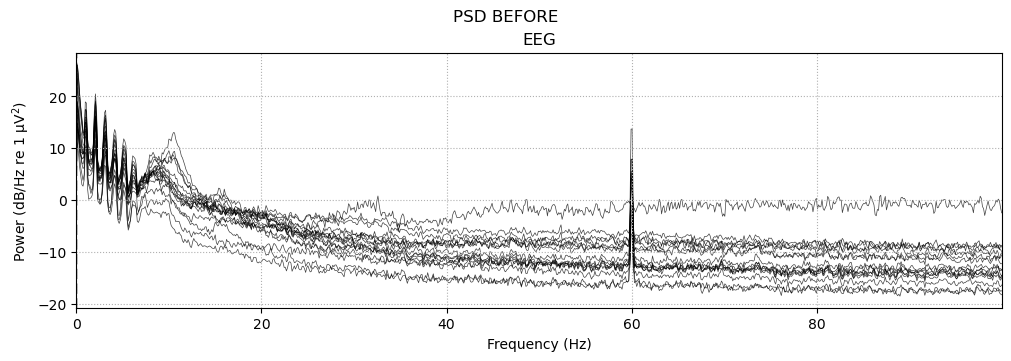

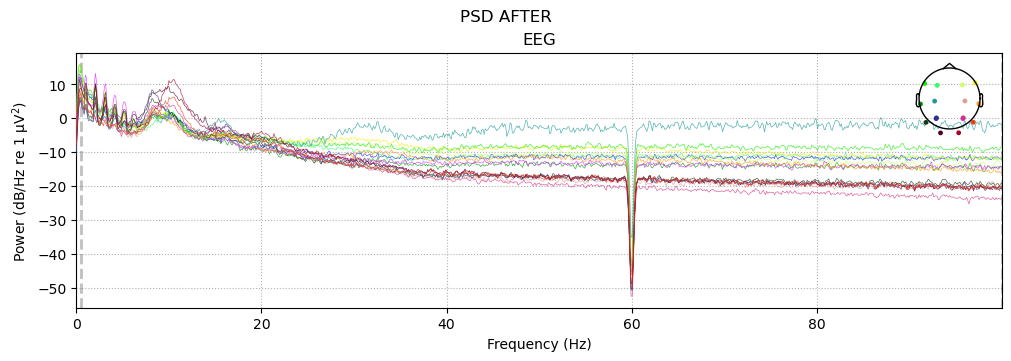

In [3]:
fig1 = res["psd_before"].plot(show=False); fig1.suptitle("PSD BEFORE"); display(fig1); plt.close(fig1)
fig2 = res["psd_after"].plot(show=False);  fig2.suptitle("PSD AFTER");  display(fig2); plt.close(fig2)

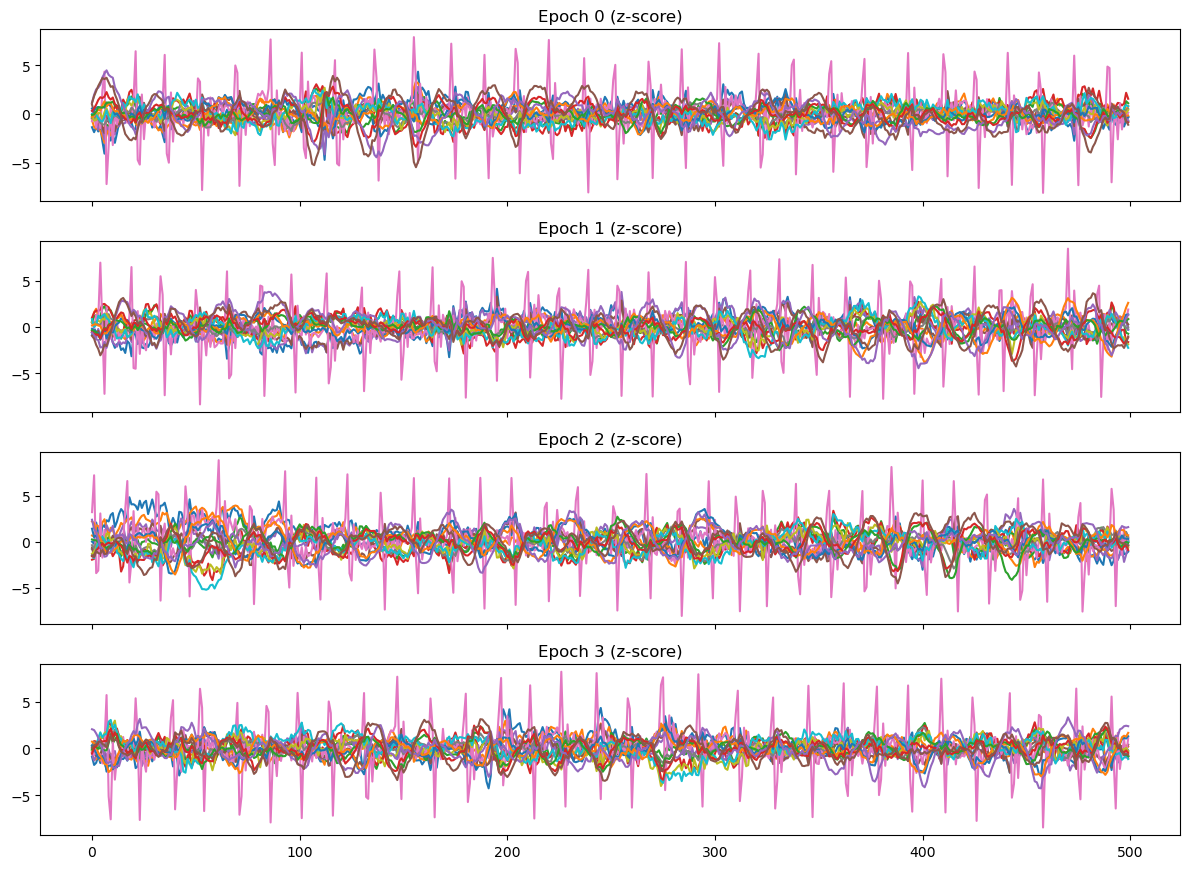

In [4]:
X = res["epochs"].get_data()
n_show = min(4, len(X))
fig, axes = plt.subplots(n_show, 1, figsize=(12, 2.2*n_show), sharex=True)
if n_show == 1: axes = [axes]
for i in range(n_show):
    axes[i].plot(X[i].T)
    axes[i].set_title(f"Epoch {i} (z-score)")
plt.tight_layout(); plt.show()